# Project

# Part A: Airbnb Price Prediction and Insights

In [105]:
# Data Handling
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Linear Regression Model
from sklearn.linear_model import LinearRegression

# Evaluation Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings('ignore')


In [144]:
# Load the dataset
df = pd.read_excel('Airbnb_data.xlsx')

# Display the shape of the dataset
print("Shape of the dataset:", df.shape)

# Display the first 5 rows
df.head()


Shape of the dataset: (74111, 29)


,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [108]:
# Overview of data types and missing values
df.info()

# Statistical summary of numeric columns
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74105 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

,id,log_price,accommodates,bathrooms,host_response_rate,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,55812.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,0.943520,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,0.163418,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,1.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


In [146]:
# Count of missing values in each column
df.isnull().sum()


id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   6
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                         10
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     968
bedrooms                     91
beds                        131
dtype: int64

In [147]:
print(df.columns.tolist())


['id', 'log_price', 'property_type', 'room_type', 'amenities', 'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city', 'description', 'first_review', 'host_has_profile_pic', 'host_identity_verified', 'host_response_rate', 'host_since', 'instant_bookable', 'last_review', 'latitude', 'longitude', 'name', 'neighbourhood', 'number_of_reviews', 'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds']


In [148]:
# List of columns you want to drop
columns_to_drop = [
    'id', 'name', 'description', 'thumbnail_url', 'host_since',
    'first_review', 'last_review', 'zipcode', 'number_of_reviews','latitude','longitude','neighbourhood'
    
]

# Drop only if columns exist
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)



# Print shape after
print("Shape after dropping columns:", df.shape)

df.head()


Shape after dropping columns: (74111, 17)


,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,review_scores_rating,bedrooms,beds
0,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,t,t,NaN,f,100.0,1.0,1.0
1,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,t,f,1.0,t,93.0,3.0,3.0
2,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,t,t,1.0,t,92.0,1.0,3.0
3,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,t,t,NaN,f,NaN,2.0,2.0
4,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,t,t,1.0,t,40.0,0.0,1.0


In [149]:
# List of boolean columns to convert
bool_columns = ['host_has_profile_pic', 'host_identity_verified', 'instant_bookable']

# Convert 't' to 1 and 'f' to 0
for col in bool_columns:
    if col in df.columns:
        df[col] = df[col].map({'t': 1, 'f': 0})
        

In [150]:
df['host_response_rate'].fillna(0, inplace=True)
df['review_scores_rating'].fillna(0, inplace=True)


In [151]:
policy_map = {'flexible': 0, 'moderate': 1, 'strict': 2}
df['cancellation_policy'] = df['cancellation_policy'].map(policy_map)


In [152]:
# Step 1: Convert to boolean first (if not already)
df['cleaning_fee'] = df['cleaning_fee'].astype(bool)

# Step 2: Convert boolean to integer (True → 1, False → 0)
df['cleaning_fee'] = df['cleaning_fee'].astype(int)

# Count how many listings exist for each dummy column
for col in df.columns:
    if col.startswith('property_type_') and df[col].sum() < 10:
        df.drop(columns=[col], inplace=True)





In [153]:
df.head()

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,review_scores_rating,bedrooms,beds
0,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,2.0,1,NYC,1.0,1.0,0.0,0,100.0,1.0,1.0
1,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,2.0,1,NYC,1.0,0.0,1.0,1,93.0,3.0,3.0
2,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,1.0,1,NYC,1.0,1.0,1.0,1,92.0,1.0,3.0
3,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,0.0,1,SF,1.0,1.0,0.0,0,0.0,2.0,2.0
4,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,1.0,1,DC,1.0,1.0,1.0,1,40.0,0.0,1.0


In [ ]:
#Value Counts for Categorical Variables

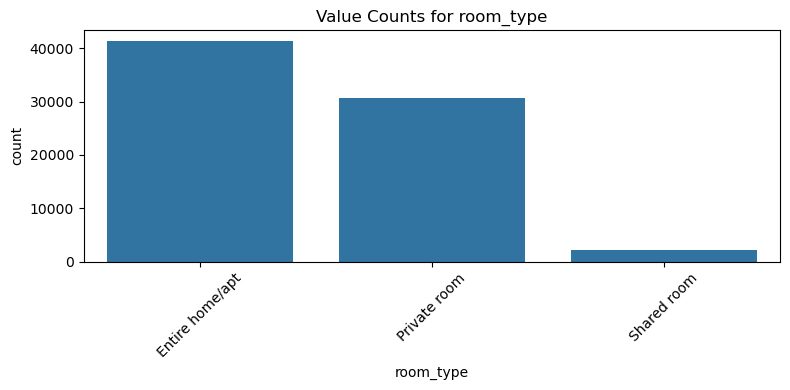

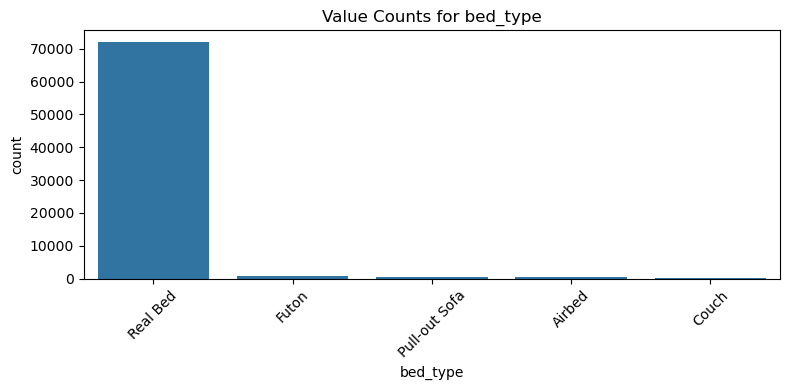

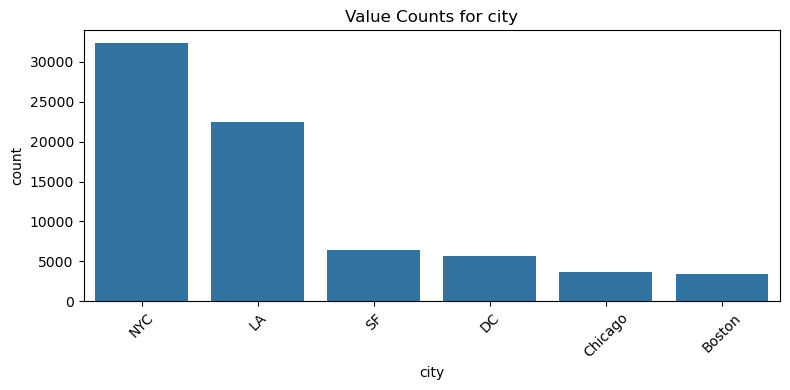

In [154]:

categorical_columns = ['room_type',  'bed_type', 'city']

for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Value Counts for {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [ ]:
#Distribution of Numeric Columns

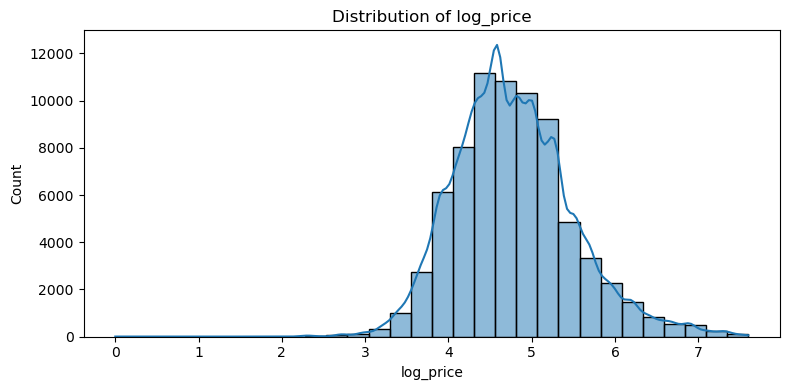

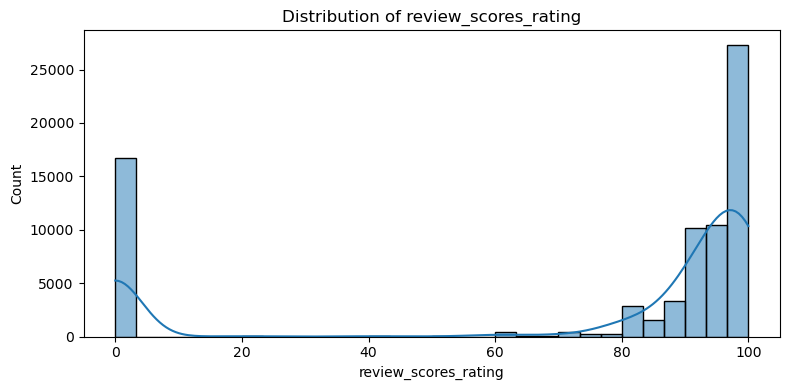

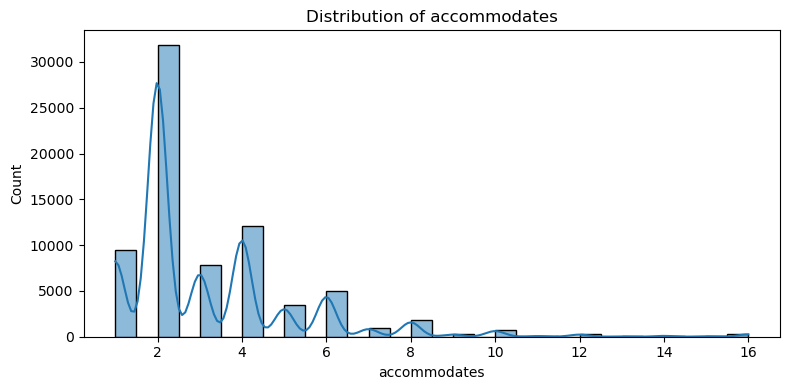

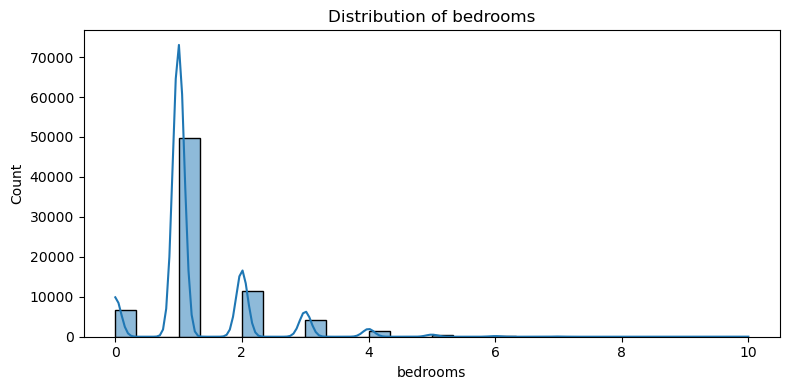

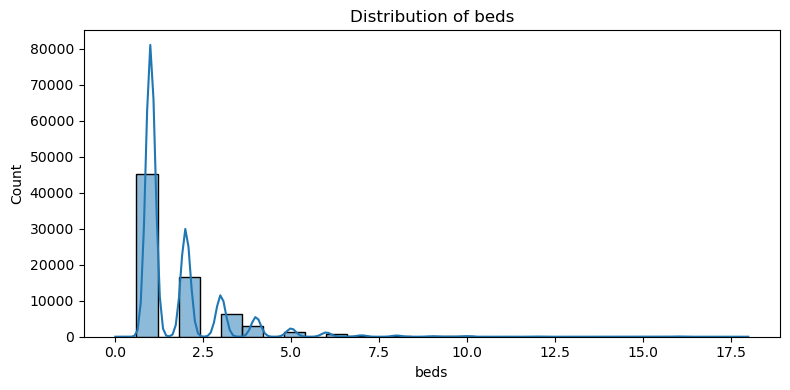

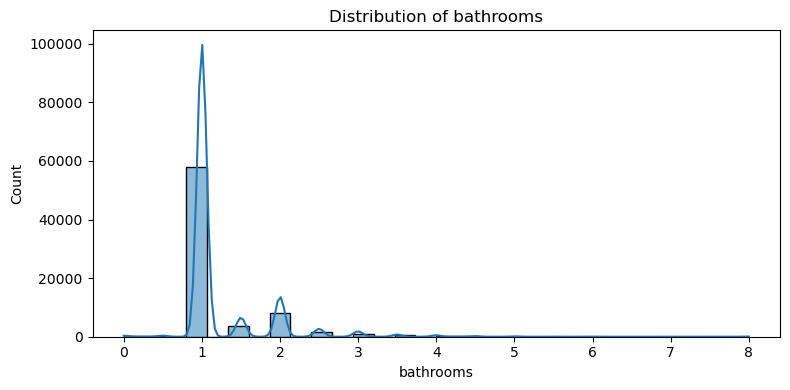

In [156]:
numeric_columns = ['log_price', 'review_scores_rating', 
                   'accommodates', 'bedrooms', 'beds', 'bathrooms']

for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=col, kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()


In [ ]:
#Find Outliers

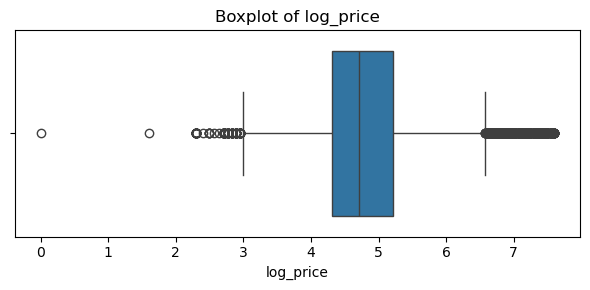

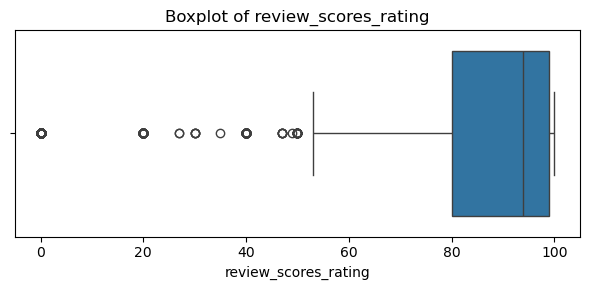

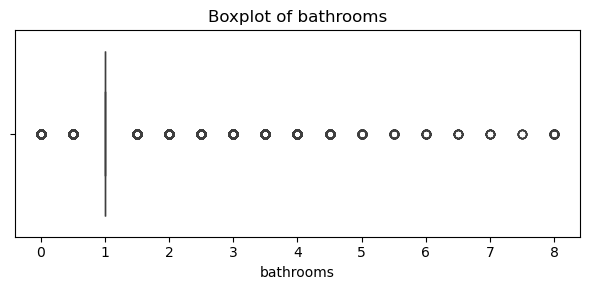

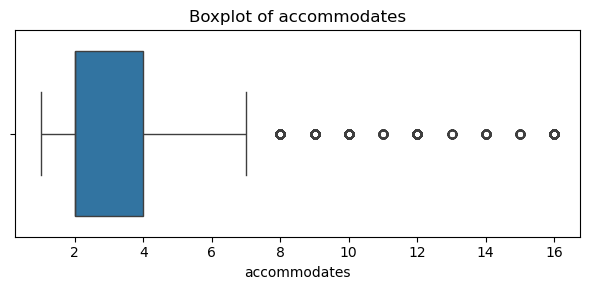

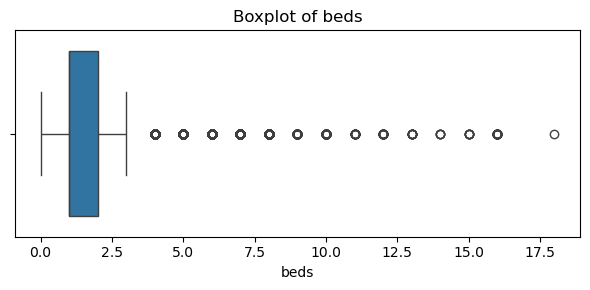

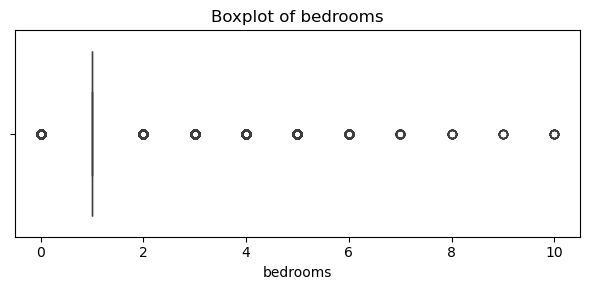

In [157]:
# boxplot for numerical value
numeric_cols = ['log_price', 'review_scores_rating', 'bathrooms', 'accommodates', 'beds', 'bedrooms']

for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()


In [159]:
df.head()

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,review_scores_rating,bedrooms,beds
0,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,2.0,1,NYC,1.0,1.0,0.0,0,100.0,1.0,1.0
1,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,2.0,1,NYC,1.0,0.0,1.0,1,93.0,3.0,3.0
2,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,1.0,1,NYC,1.0,1.0,1.0,1,92.0,1.0,3.0
3,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,0.0,1,SF,1.0,1.0,0.0,0,0.0,2.0,2.0
4,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,1.0,1,DC,1.0,1.0,1.0,1,40.0,0.0,1.0


In [ ]:
# outlier by iqr method

In [160]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return outliers

# List of numeric columns to check
numeric_cols = ['log_price', 'review_scores_rating', 'accommodates', 'bathrooms', 'bedrooms', 'beds', ]

# Check outlier count in each
for col in numeric_cols:
    outliers = detect_outliers_iqr(df, col)
    print(f"{col}: {len(outliers)} outliers")


log_price: 1532 outliers
review_scores_rating: 16952 outliers
accommodates: 3604 outliers
bathrooms: 15812 outliers
bedrooms: 24236 outliers
beds: 5686 outliers


In [ ]:
# remove outlier 

In [161]:
def outliercount(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return df[(df[col] < lower) | (df[col] > upper)].shape[0]


In [163]:
cols = ['bathrooms', 'bedrooms', 'beds', 'accommodates']

for col in cols:
    print(f"{col}: {outliercount(df, col)} outliers")


bathrooms: 15812 outliers
bedrooms: 24236 outliers
beds: 5686 outliers
accommodates: 3604 outliers


In [ ]:
#2. Model Development

In [ ]:
#2.1Define Features and Target give code

In [164]:
# Define target variable
y = df['log_price']

# Drop target and any columns not meant for prediction
X = df.drop(columns=['log_price'])


In [165]:
#confirm the shape:
print("Feature shape:", X.shape)
print("Target shape:", y.shape)


Feature shape: (74111, 16)
Target shape: (74111,)


In [ ]:
#2.2 Split the Dataset

In [166]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Print shapes to verify
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (59288, 16)
X_test shape: (14823, 16)
y_train shape: (59288,)
y_test shape: (14823,)


In [ ]:
#2.3: Train a Regression Model

In [173]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)


In [174]:
 #Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)


In [ ]:
#2.3 evaluate model ( mas,mse,rmse,r2)

In [175]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on test data
y_pred = lr_model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")


Mean Absolute Error (MAE): 0.3603
Mean Squared Error (MSE): 0.2231
Root Mean Squared Error (RMSE): 0.4724
R-squared (R²): 0.5657


In [ ]:
#Comparison with Advanced Models

In [176]:
from sklearn.ensemble import RandomForestRegressor



In [ ]:
#Make Predictions

In [177]:
# Initialize models
rf_model = RandomForestRegressor(random_state=42)


# Train models
rf_model.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

In [ ]:
#Define Evaluation Function

In [178]:
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"\n📊 {model_name} Evaluation:")
    print(f"MAE : {mae:.4f}")
    print(f"MSE : {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²  : {r2:.4f}")


In [ ]:
#Compare All Two Models

In [179]:
# Linear Regression prediction (if not already done)
y_pred = lr_model.predict(X_test)


In [180]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"\n📊 {model_name} Evaluation:")
    print(f"MAE : {mae:.4f}")
    print(f"MSE : {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²  : {r2:.4f}")


In [181]:
# Linear Regression (you already trained this)
y_pred = lr_model.predict(X_test)

# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)


In [182]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def get_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return [mae, mse, rmse, r2]


In [183]:
# Collect metrics
lr_metrics = get_metrics(y_test, y_pred)
rf_metrics = get_metrics(y_test, rf_predictions)

# Create a DataFrame to compare
import pandas as pd

results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "MAE": [lr_metrics[0], rf_metrics[0]],
    "MSE": [lr_metrics[1], rf_metrics[1]],
    "RMSE": [lr_metrics[2], rf_metrics[2]],
    "R² Score": [lr_metrics[3], rf_metrics[3]],
})

# Display comparison
print(results)


               Model       MAE       MSE      RMSE  R² Score
0  Linear Regression  0.360263  0.223115  0.472351  0.565692
1      Random Forest  0.355207  0.223766  0.473039  0.564426


In [186]:
# Install xgboost (if running in Jupyter or Colab)
!pip install xgboost

In [188]:
# Import necessary packages
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Train the XGBoost model
xgb_model = XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on test set
xgb_pred = xgb_model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, xgb_pred)
mse = mean_squared_error(y_test, xgb_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, xgb_pred)

# Print results
print(f"XGBoost Evaluation Metrics:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

XGBoost Evaluation Metrics:
MAE: 0.3332
MSE: 0.1942
RMSE: 0.4406
R² Score: 0.6220


video explaination

https://drive.google.com/file/d/1XLhdHnmJaaGxaDWW1V9dXhbSgliuNjey/view?usp=sharing